# Comparative Analysis of Sentiment and Polarity over time

In this notebook, the transcript of the pilot (i.e., first) episode of a new show is comapred against those of the 10 English US TV shows of the 'workplace comedy' genre in our previous analysis for sentiment and polarity over time to observe the styles across shows and identify considerably similarities/differences between this show and the others.

Note: Initial sentiment analysis was performed on the scripts rather than transcripts. However, the presence of several "action" statements that conveyed both emotion and information considerably affected the results. The script and transcript of the same show could exhibit greatly varying subjectivity and polarity. Hence, it seemed more advisable to stick to transcripts instead.

In [44]:
#For transcript
shows=['30 rock','American auto','B99','Its always sunny','Mindy project','Parks and rec','The office','Scrubs','Silicon valley','Superstore','Veep']

In [45]:
%pwd

'd:\\Abhinaya\\GitHub\\nlp-workplace-comedies'

## Storing scripts from text files into a dictionary
To work on the script for each show, a dictionary with the key as show name and value as the text from the script's text file is created. Initial data cleaning includes eliminating neline characters.

In [46]:
'''Want to automate extraction of text from text file so that we dont have to go file-wise'''
import re

my_dict = {}
for i, sh in enumerate(shows):
     #with open("pilots/" + sh + " .txt", "r", encoding="utf-8") as file:
    with open("pilots/" + sh + " transcript.txt", "r", encoding="utf-8") as file:
        text=file.read()
        #replace newline characters with space (because character name and dialogue shouldnt get fused together)
        text=text.replace("\n"," ")
        #replace weird quotation marks, ellipsis
        text = re.sub('[‘’“”…]', '', text)
        #save the script as value to corresponding show in the dictionary
        my_dict[sh]=text
        file.close()
         
my_dict.keys()  

dict_keys(['30 rock', 'American auto', 'B99', 'Its always sunny', 'Mindy project', 'Parks and rec', 'The office', 'Scrubs', 'Silicon valley', 'Superstore', 'Veep'])

In [47]:
#To see what a script looks like, execute the line below.
#my_dict['Superstore']


'Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love?  Amy: That\'s actually a cubic zirconia knockoff. It\'s called PlastiClear. Bo: What happened to the $8 ones? Amy: We\'re all sold out of those, sorry. But this one\'s only $2 more. Bo: I get it. You advertise the cheap jewelry to get the suckers in the door, then you push the expensive stuff. Amy: Well, I wouldn\'t use the word "suckers" or "expensive" or "jewelry". Bo: Fine. I got to stand in line for cigarettes anyhow. Amy: Great. I hope you and your fiance are very happy together. And that you don\'t procreate. Glenn? Glenn: Huh? Amy: I\'m taking a mental-health break.  Glenn: Okay. Have fun now. Reflect.  Dina: Just checking over your new hire forms. American citizen. Nice. No dependents. Me neither, unless you count my birds. It just doesn\'t say anywhere on here if you\'ve 

## Additional Data Cleaning
Observing the data after initial cleaning reveals scope for additional cleaning, such as replacing dollar signs and removing any pieces of text between round or square brackets (which are usually used to indicate the action component in scripts, whereas we want to focus on the dialogue alone.)

In [48]:
## Some more cleaning

#The single quotation mark is getting a \ before it as can be seen above. So we clean it below such that its back to ' form
text=''
for key, val in my_dict.items():
    text=str(my_dict.get(key))
    #use text variable as LHS and RHS (not my_dict[key] as LHS) in all substitutions otherwise edits wont carry forward
    text = re.sub('[‘’“”…]', '', text)
    '''Text within 2 dollar signs renders in italics. 
    To avoid this, replacing symbol with word 'dollar'''
    text = re.sub('\$', 'dollar ', text)
    text = re.sub("[\(\[].*?[\)\]]", "", text) #remove text within square or round brackets
    text = re.sub('\(.*?\)', '', text)
    my_dict[key]=text
    #print(my_dict[key]) #print out the script for each show after additional cleaning

MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy.  GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You think there's two lines and we all chose to be in this one and you're the only genius who got in the other line? Do you believe this guy? LISA  What are you doing?! He screws you over and now you're lining up behind him? Lisa down. LISA  Will not one of you stand with me?! GUY Hey, shut up-- What kind do you want? Shut up?!! Lisa is now at the front of her line, boiling mad. COUNTER GIRL Can I help you? LISA Yeah, Teli take everything. I want every bagel in this place. I'm buying all the bagels.  A

In [49]:
# We are going to change the individual sentence-wise scripts to key: show name, value: script in string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(str(list_of_text)) #have to use str() otherwise errors in parsing text
    return combined_text

# Bind the contents of each script together and store combined form into dictionary
data_combined = {key: [combine_text(value)] for (key, value) in my_dict.items()}
#data_combined['Superstore'] #print combined data of one show wherein show name is dict key and script is corresponding dict value

['Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love?  Amy: That\'s actually a cubic zirconia knockoff. It\'s called PlastiClear. Bo: What happened to the dollar 8 ones? Amy: We\'re all sold out of those, sorry. But this one\'s only dollar 2 more. Bo: I get it. You advertise the cheap jewelry to get the suckers in the door, then you push the expensive stuff. Amy: Well, I wouldn\'t use the word "suckers" or "expensive" or "jewelry". Bo: Fine. I got to stand in line for cigarettes anyhow. Amy: Great. I hope you and your fiance are very happy together. And that you don\'t procreate. Glenn? Glenn: Huh? Amy: I\'m taking a mental-health break.  Glenn: Okay. Have fun now. Reflect.  Dina: Just checking over your new hire forms. American citizen. Nice. No dependents. Me neither, unless you count my birds. It just doesn\'t say anywhere on her

In [50]:
# We can put the dictionary into a pandas dataframe
import pandas as pd
#for displaying below
pd.set_option('max_colwidth',500)
#transpose() allows saving the script for each show in row-wise fashion
data_df = pd.DataFrame.from_dict(data_combined).transpose()
#Name the column containing script
data_df.columns = ['Script']
data_df = data_df.sort_index()
data_df

,Script
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You..."
American auto,"KATHERINE Im just not sure I like the name Ponderosa for a car. ELLIOT It tested well. People thought it evoked feelings of nature and strength. KATHERINE It sounds like ponderous to me, like dull, like a dull, ponderous car. ELLIOT It comes from the Ponderosa pine tree. KATHERINE Do people want to drive a tree? ELLIOT Um... SADIE Not a literal tree, its just the vibe. CYRUS Theres a Ponderosa lemon. KATHERINE Isnt a lemon literally how people refer to a bad car? Might as well..."
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A..."
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC..."
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin..."
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ..."
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ..."
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont have to fucking write that shit. You can buy that shit! BIG HEAD Or download a bootleg. THOMAS None of that CodeAcademy crap for my web site. The whol

# Analyzing sentiment

Sentiment of the scripts is analyzed in terms of 
### polarity
and 
### subjectivity
using the textblob library.

In [51]:
# Create quick lambda functions to find the polarity and subjectivity of each script
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['Script'].apply(pol)
data_df['subjectivity'] = data_df['Script'].apply(sub)
data_df

,Script,polarity,subjectivity
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You...",0.142119,0.525155
American auto,"KATHERINE Im just not sure I like the name Ponderosa for a car. ELLIOT It tested well. People thought it evoked feelings of nature and strength. KATHERINE It sounds like ponderous to me, like dull, like a dull, ponderous car. ELLIOT It comes from the Ponderosa pine tree. KATHERINE Do people want to drive a tree? ELLIOT Um... SADIE Not a literal tree, its just the vibe. CYRUS Theres a Ponderosa lemon. KATHERINE Isnt a lemon literally how people refer to a bad car? Might as well...",0.086146,0.501381
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A...",0.169035,0.519843
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC...",0.174016,0.562299
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin...",0.155281,0.577888
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ...",0.114829,0.528405
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ...",0.088812,0.522610
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont ha

In [52]:
#Add a column with show names for displaying in sentiment graph scatter plot
#This list has to be in alphabetical order because it gets stored that way during later analysis
#full_show_names=['30 Rock','Brooklyn Nine Nine','Brooklyn Nine Nine_Transcript_Only','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Party Down','Scrubs','Silicon Valley','Superstore','Superstore_Transcript_Only','The Office','Veep']
full_show_names=['30 Rock','American Auto','Brooklyn Nine Nine','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Scrubs','Silicon valley','Superstore','The Office','Veep']
data_df['Show_name']=full_show_names
data_df

,Script,polarity,subjectivity,Show_name
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You...",0.142119,0.525155,30 Rock
American auto,"KATHERINE Im just not sure I like the name Ponderosa for a car. ELLIOT It tested well. People thought it evoked feelings of nature and strength. KATHERINE It sounds like ponderous to me, like dull, like a dull, ponderous car. ELLIOT It comes from the Ponderosa pine tree. KATHERINE Do people want to drive a tree? ELLIOT Um... SADIE Not a literal tree, its just the vibe. CYRUS Theres a Ponderosa lemon. KATHERINE Isnt a lemon literally how people refer to a bad car? Might as well...",0.086146,0.501381,American Auto
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A...",0.169035,0.519843,Brooklyn Nine Nine
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC...",0.174016,0.562299,Its Always Sunny in Philadelphia
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin...",0.155281,0.577888,The Mindy Project
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ...",0.114829,0.528405,Parks and Recreation
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ...",0.088812,0.522610,Scrubs
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HE

# Visualizing polarity-subjectivity results

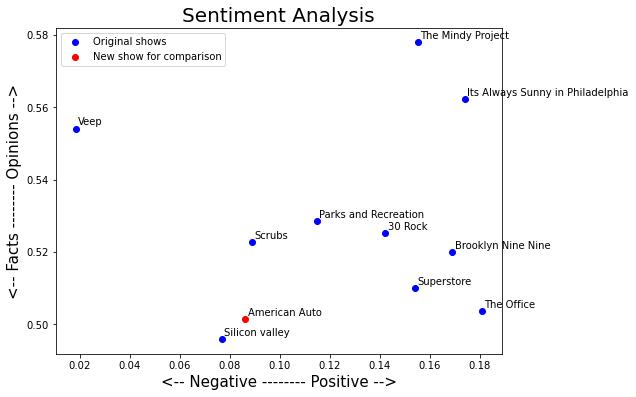

In [53]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]
#colors = ['b'] * 11
#colors[1] = 'r'

for index, show in enumerate(data_df.index):
    x = data_df.polarity.loc[show]
    y = data_df.subjectivity.loc[show]
    if (data_df['Show_name'][index]!='American Auto'):
        plt.scatter(x,y,color='blue')
    else:
        plt.scatter(x,y,color='red')
    #plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_df['Show_name'][index], fontsize=10)
    #plt.xlim(-.01, .12) 

   
plt.scatter([],[],c='b',label='Original shows')
plt.scatter([],[],c='r',label='New show for comparison')
plt.legend(loc='best')
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Analysis of polarity & subjectivity for a new script
The goal was to compare the script of a new show against those of the original 10 shows to analyze the sentiment of the new show with respect to these shows.
The new show chosen for this purpose was an American workplace comedy titled "American Auto", which released in 2021. This show was created by the same person and network as the show "Superstore", so it will be interesting to see the extent of similarities and differences between the two shows in particular, and if a viewer who enjoyed "Superstore" may enjoy "American Auto".
## Subjectivity (measured along Y-axis; range: 0 to 1)
We can see that American Auto tends to adopt a fact-based rather than opinion-based style of dialogue. This show has a similar subjectivity as most shows in this genre, like The Office and Silicon Valley. This means that subjectivity won't tell us much about whether this show stands out compared to the others.
## Polarity (measured along X-axis; range: -1 to 1)
We can see that American Auto has almost HALF the positivity that shows like "Superstore" and "Brooklyn Nine-Nine" have, or in other words, it has double the negativity as these shows. The positive sentiment in dialogues/character interactions is at par with those in shows like "Silicon Valley" and "Scrubs".

## Overall
People who enjoy "Silicon Valley" overall are likely to enjoy "American Auto" in terms of polarity and subjectivity. 
Superstore isnt particularly unique in terms of either polarity or subjectivity; however, we are aware of the behind-the-scenes similarities between the creation of Superstore and American Auto, which gives us hope for considerable similarities between these two shows in particular.
Sadly, people who enjoy "Superstore" may find the tone of "American Auto" to be quite negative in comparison; this means they will have to re-watch Superstore instead of trying this new show in spite of the anticipated similarities.


# Sentiment of Script Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time in each script.

In [54]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [55]:
# Let's take a look at our data again
data_df
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_df.Script:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [56]:
# The list has 10 elements, one for each script
len(list_pieces)

11

In [57]:
# Each script has been split into 10 pieces of text
len(list_pieces[0])

10

There seem to be 3 distinct outliers in terms of subjectivity. Hence, lets stick to analyzing only the polarity over time; this will tell us more about each show and provide better insight for the chunks of shows that exhibit similar levels of polarity.

In [58]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.03141369047619047,
  0.1489484126984127,
  0.16267006802721087,
  0.07893365614270784,
  0.2819982290436836,
  0.17916666666666667,
  -0.03251488095238095,
  0.3235902255639097,
  0.03939805665349145,
  0.1871008852258852],
 [-0.14066091954022988,
  0.009848070901537697,
  0.10588788316061044,
  0.021791801604349244,
  -0.011489232831562356,
  0.1554172237076649,
  0.09245217148442954,
  0.22460671768707477,
  0.18650597590814982,
  0.20866013071895426],
 [0.07587081128747798,
  0.21298981191222574,
  0.17649923605805962,
  0.2130847953216374,
  0.23830645161290323,
  0.11485863095238096,
  0.21365828615828614,
  0.06266306001642308,
  0.2716830931591387,
  0.13384419436177245],
 [0.18855596784168213,
  0.10930679563492063,
  0.07911501377410468,
  0.06753663003663002,
  0.19243443080357142,
  0.22868550368550367,
  0.2329633763227513,
  0.1898333333333333,
  0.23988729369588746,
  0.12232014573070608],
 [0.00964472309299895,
  0.23298611111111114,
  -0.03534586940836941,
  0.0801

# Visualizing the polarity of each show over time

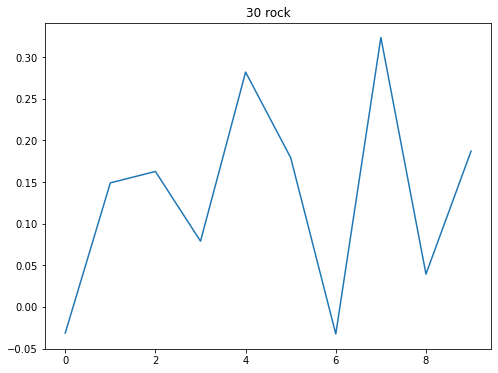

In [59]:
# Show the plot for one show
plt.plot(polarity_transcript[0])
plt.title(data_df['Show_name'].index[0])
plt.show()

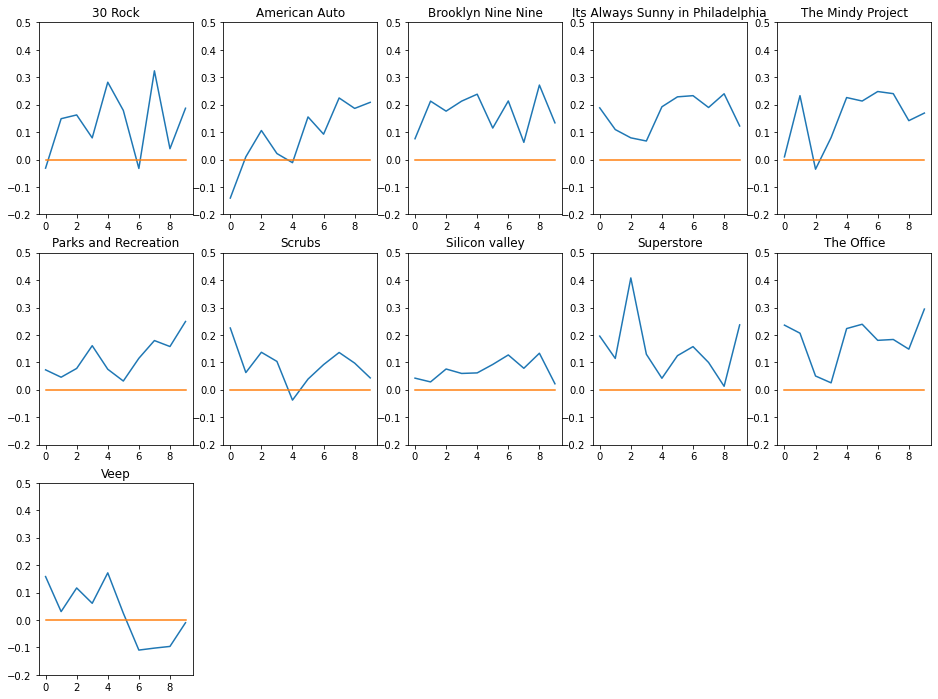

In [60]:
# Show the plot for all shows
plt.rcParams['figure.figsize'] = [16, 12]

for index, show in enumerate(data_df.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data_df['Show_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)
    
plt.show()

# Analysis of results for comparison with original shows
The polarity over time for the script of the new show considered here, "American Auto" tells an interesting story.
1. American Auto has a deeply negative start to the show, compared to the beginnings of all other shows included in our analysis.
No other show-- neither Superstore which is expected to be similar, nor the show "Veep" which was previously identified as an outlier for its polarity, consists of this level of negativity at the beginning of the episode.
2. This is an interesting insight because viewers may not want to be confronted with negativity when they are attempting to watch a new show of the comedy genre. Its important to retain viewer attention because if they like the first episode of the show, they are likelier to continue watching the show. Consequently, its better to manitain their interest in the inital stages of the episode.
3. After the beginning of the show, American Auto exhibits an increasing trend of positivity with minor dips and ends on a high note. This characteristic once again differentiates this show from the patterns shown by others. This may be an attempt to overcome the high level of negativity in the early part of the episode, but it may be advisable to distribute the negativity during the episode rather than concentrating it at the beginning.
4. American Auto does not achieve the same positivity peak as Superstore; in fact its highest peak is half of that achieved by Superstore. This corroborates our earlier finding that American Auto is not as positive in sentiment as Superstore, and may not be a recommended watch for someone who enjoyed Superstore.